In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
!pip install -q keras-tuner

In [ ]:
import keras_tuner

In [ ]:
(xtrain, _),(xtest, _) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape,xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
xtrain = xtrain/255.0
xtest = xtest/255.0

In [ ]:
xtrain = xtrain.reshape(len(xtrain),xtrain.shape[1]*xtrain.shape[2])
xtest = xtest.reshape(len(xtest),xtest.shape[1]*xtest.shape[2])

In [ ]:
xtrain.shape,xtest.shape

((60000, 784), (10000, 784))

In [ ]:
#del model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(784))
model.add(tf.keras.layers.Dense(784))
model.add(tf.keras.layers.Dense(32,activation = 'relu'))
model.add(tf.keras.layers.Dense(784))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 784)               615440    
                                                                 
 dense_23 (Dense)            (None, 32)                25120     
                                                                 
 dense_24 (Dense)            (None, 784)               25872     
                                                                 
Total params: 666432 (2.54 MB)
Trainable params: 666432 (2.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import keras_tuner.engine.hyperparameters as hp
from keras_tuner.tuners import RandomSearch

In [ ]:
model.compile('adam',loss = 'mse')

In [ ]:
model.fit(xtrain,xtrain,batch_size =32, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 44s 9ms/step - loss: 0.0375
Epoch 2/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0273
Epoch 3/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0230
Epoch 4/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0214
Epoch 5/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0203
Epoch 6/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0197
Epoch 7/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0199
Epoch 8/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0194
Epoch 9/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0194
Epoch 10/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0194
Epoch 11/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0322
Epoch 12/15
 102/1875 [>.............................] - ETA: 19s - loss: 

KeyboardInterrupt: ignored

1/1 [==============================] - 0s 30ms/step


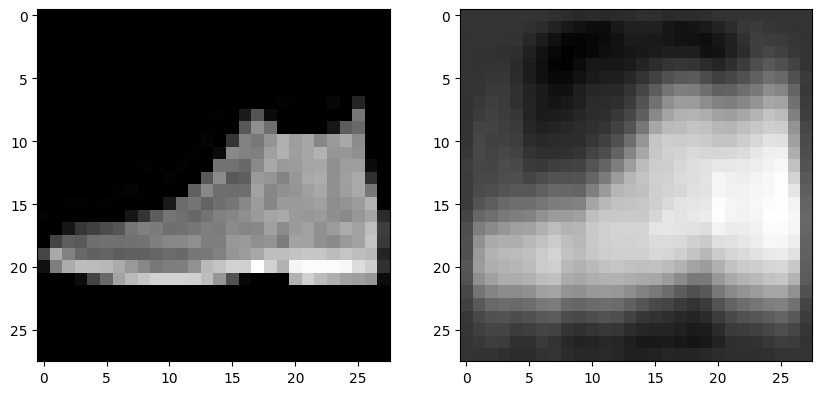

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(xtest[0].reshape(28,28),cmap = 'gray')
test = np.expand_dims(xtest[0],axis=0)
pred = model.predict(test)
pred = pred.reshape(28,28)
plt.subplot(1,2,2)
plt.imshow(pred,cmap = 'gray')

In [ ]:
pred = model.predict(xtest)

313/313 [==============================] - 2s 5ms/step


enter number of images:11


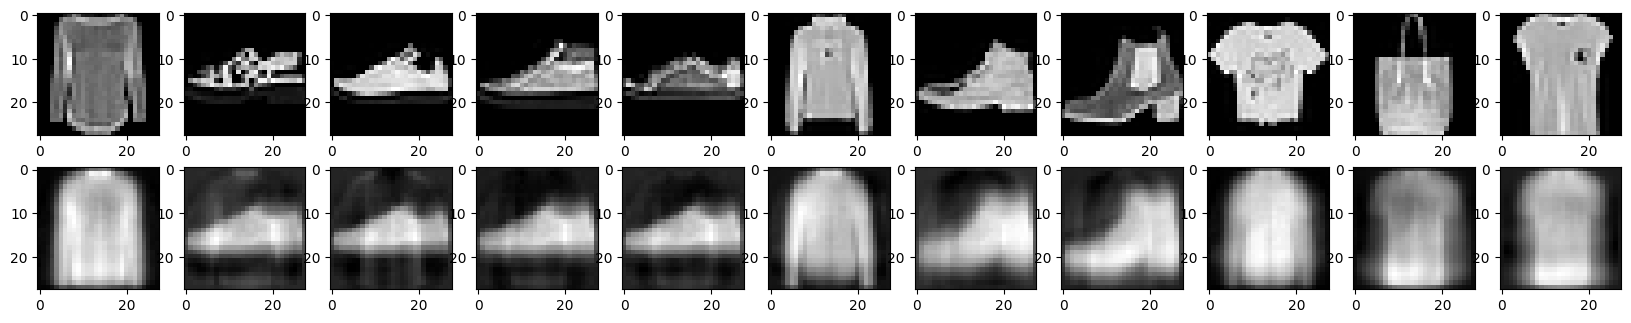

In [ ]:
n_image = int(input('enter number of images:'))
index = np.random.randint(0,10000,n_image)
for i,idx in enumerate(index):
  plt.subplots_adjust(right = 2.6, top =0.7)
  plt.subplot(2,n_image,i+1)
  plt.imshow(xtest[idx].reshape(28,28),cmap = 'gray')
  plt.subplot(2,n_image,i+n_image+1)
  plt.imshow(pred[idx].reshape(28,28),cmap = 'gray')